In [34]:
"""
Description: Inspection and visualization of the 'heart_rate.csv' file.
File source: downloaded from link in ./../project_description.txt

App Source: https://developer.samsung.com/onlinedocs/health/index.html?com/samsung/android/sdk/healthdata/HealthConstants.html

Notes:

"""

"\nDescription: Inspection and visualization of the 'heart_rate.csv' file.\nFile source: downloaded from link in ./../project_description.txt\n\nApp Source: https://developer.samsung.com/onlinedocs/health/index.html?com/samsung/android/sdk/healthdata/HealthConstants.html\n\nNotes:\n\n"

In [35]:
#General imports 
import sys
import os
from datetime import datetime, timedelta, date
from collections import Counter
import numpy as np
import pandas as pd
import seaborn as sns
from retrieve_time import Retrieve_Timestamps

In [36]:
#Initialize relevant variables
M = {}
time_format = '%Y-%m-%d %H:%M:%S.%f'

## Collect the data

In [37]:
#Read the sleep data.
fpath = './../data/heart_rate.csv'
data = pd.read_csv(fpath, header=0, index_col=0, low_memory=False)

(311, 12)


## Pre-process the data

In [38]:
#Sort dictionary based on the 'start_time' column.
#Create datetime objects and collect the bedtime hours.
starttime_obj = Retrieve_Timestamps(
  data['start_time'].values, data['time_offset'].values, 'UTC', 'datestr', time_format).out
#The two earliest dates seem spurious. Remove them.
data = data.drop(data[data.start_time == min(data.start_time)].index)

starttime_obj = Retrieve_Timestamps(
  data['start_time'].values, data['time_offset'].values, 'UTC', 'datestr', time_format).out
endtime_obj = Retrieve_Timestamps(
  data['end_time'].values, data['time_offset'].values, 'UTC', 'datestr', time_format).out

M['start_hour'] = np.array([t.hour + t.minute/60. + t.second/3600. for t in starttime_obj])

## Time range

In [39]:
print('Start date: ', (min(starttime_obj)))
print('End date: ', (max(starttime_obj)))

Start date:  2016-06-09 20:11:04.783000+05:30
End date:  2018-04-25 14:46:13.476000-03:00


In [40]:
#Compute time progression variable and sort dataframe according to it.
ref_date = min(starttime_obj)
time_prog = starttime_obj - ref_date
data['time_prog'] = np.array([t.days + t.seconds/86400. for t in time_prog]) #In days
data['start_hour'] = np.array([t.hour + t.minute/60. + t.second/3600. for t in starttime_obj])

data.sort_values(by ='time_prog', inplace=True)

#Compute time duration.
#duration = endtime_obj_corr - starttime_obj_corr
#M['duration'] = np.array([t.days*24.*60 + t.seconds/60. for t in duration]) #In minutes

#M['heart_beat_count'] = data['heart_beat_count'].values

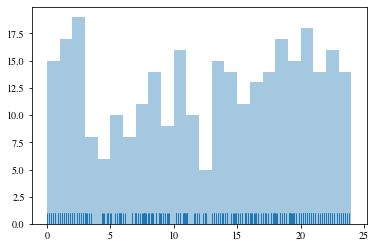

In [41]:
sns.distplot(data['start_hour'].values, bins=np.arange(0,24.1,1), kde=False, rug=True)

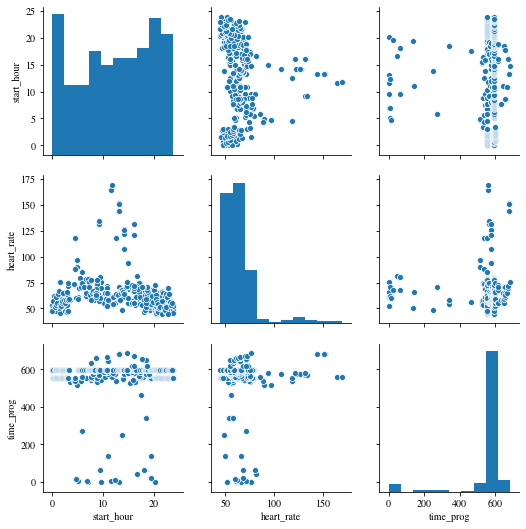

In [42]:
pair_cols = ['start_hour', 'heart_rate', 'time_prog']
df2 = data[pair_cols]
g = sns.pairplot(df2)